# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Fixing random state for reproducibility
np.random.seed(2360873)

df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [2]:
# Analisando base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [3]:
# Avaliando info com dados NaN dentro da variável tempo_emprego
df[df['tempo_emprego'].isna()]

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
12,12,2015-01-01,5090,M,True,True,2,Pensionista,Primário,Casado,Casa,60,NaN,4.0,False,5114.70
19,19,2015-01-01,1860,M,True,True,0,Pensionista,Superior completo,Casado,Casa,64,NaN,2.0,False,4501.53
26,26,2015-01-01,3453,F,False,True,1,Pensionista,Secundário,Casado,Casa,56,NaN,3.0,False,2053.04
27,27,2015-01-01,2317,F,False,True,0,Pensionista,Secundário,Casado,Casa,65,NaN,2.0,False,6714.39
30,30,2015-01-01,13799,F,True,False,0,Pensionista,Primário,Casado,Casa,64,NaN,2.0,False,1350.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14970,14970,2016-03-01,6998,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,65,NaN,1.0,False,2880.59
14975,14975,2016-03-01,6990,F,False,True,0,Pensionista,Superior incompleto,Viúvo,Casa,66,NaN,1.0,False,4625.11
14977,14977,2016-03-01,307,F,False,False,0,Pensionista,Superior completo,Viúvo,Casa,59,NaN,1.0,False,1265.07
14988,14988,2016-03-01,15110,F,False,True,0,Pensionista,Secundário,Casado,Casa,51,NaN,2.0,False,853.98


In [4]:
# Avaliando o percentual de NaN
df['tempo_emprego'].isna().sum()/15000

0.16893333333333332

In [5]:
# Descisão tomada para excluir linhas NaN dentro do dataframe
df.dropna(subset=['tempo_emprego'], inplace=True)
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [6]:
# Analisando o total de variáveis que o pandas carregou
df.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [7]:
# Excluindo variáveis desnecessárias para análise
df.drop(columns=['Unnamed: 0', 'index', 'mau'], inplace=True)
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


In [8]:
# Utilizando o método corr do pandas para calcular a matriz de correlação
df.corr()

C:\Users\ludmi\AppData\Local\Temp\ipykernel_6996\1737837173.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
posse_de_veiculo,1.000000,0.003308,0.077668,-0.090136,-0.087514,0.122773,0.040626
posse_de_imovel,0.003308,1.000000,0.024429,0.081715,0.000112,0.015852,0.040138
qtd_filhos,0.077668,0.024429,1.000000,-0.289012,-0.074250,0.908703,-0.016189
idade,-0.090136,0.081715,-0.289012,1.000000,0.323934,-0.257281,0.151364
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.122773,0.015852,0.908703,-0.257281,-0.065748,1.000000,-0.004865
renda,0.040626,0.040138,-0.016189,0.151364,0.394235,-0.004865,1.000000


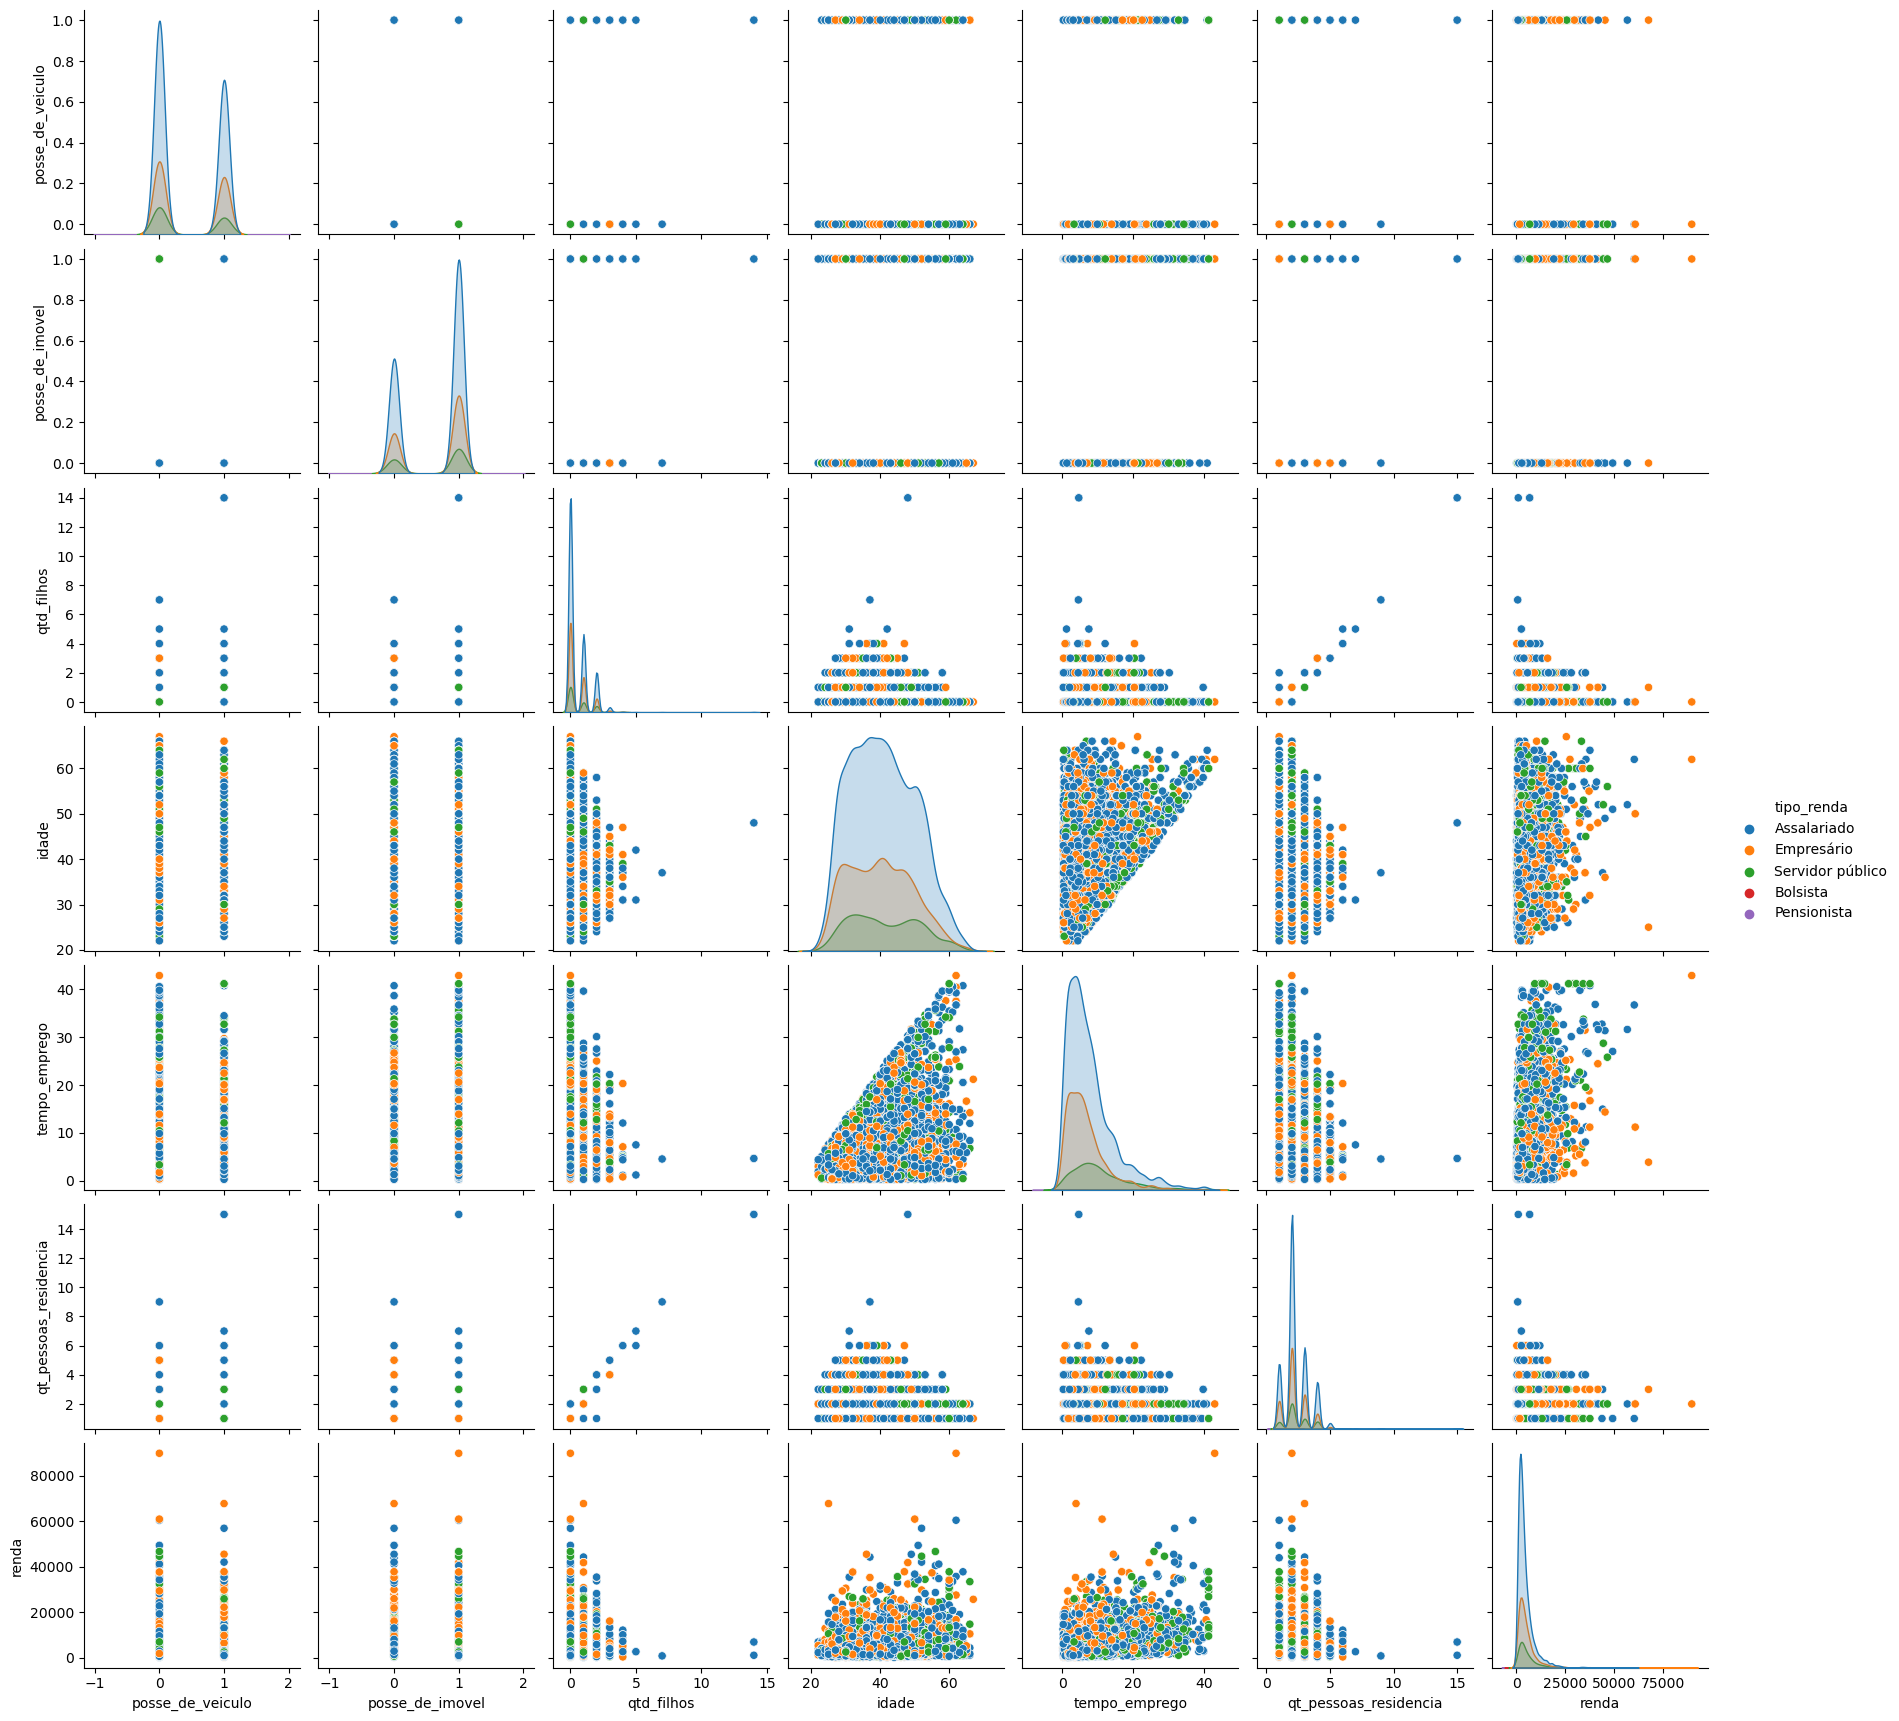

In [9]:
df_2 = sns.pairplot(df, hue='tipo_renda')
df_2

C:\Users\ludmi\AppData\Local\Temp\ipykernel_6996\1219530480.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), figsize=(10,10), center = 0, cmap=cmap)


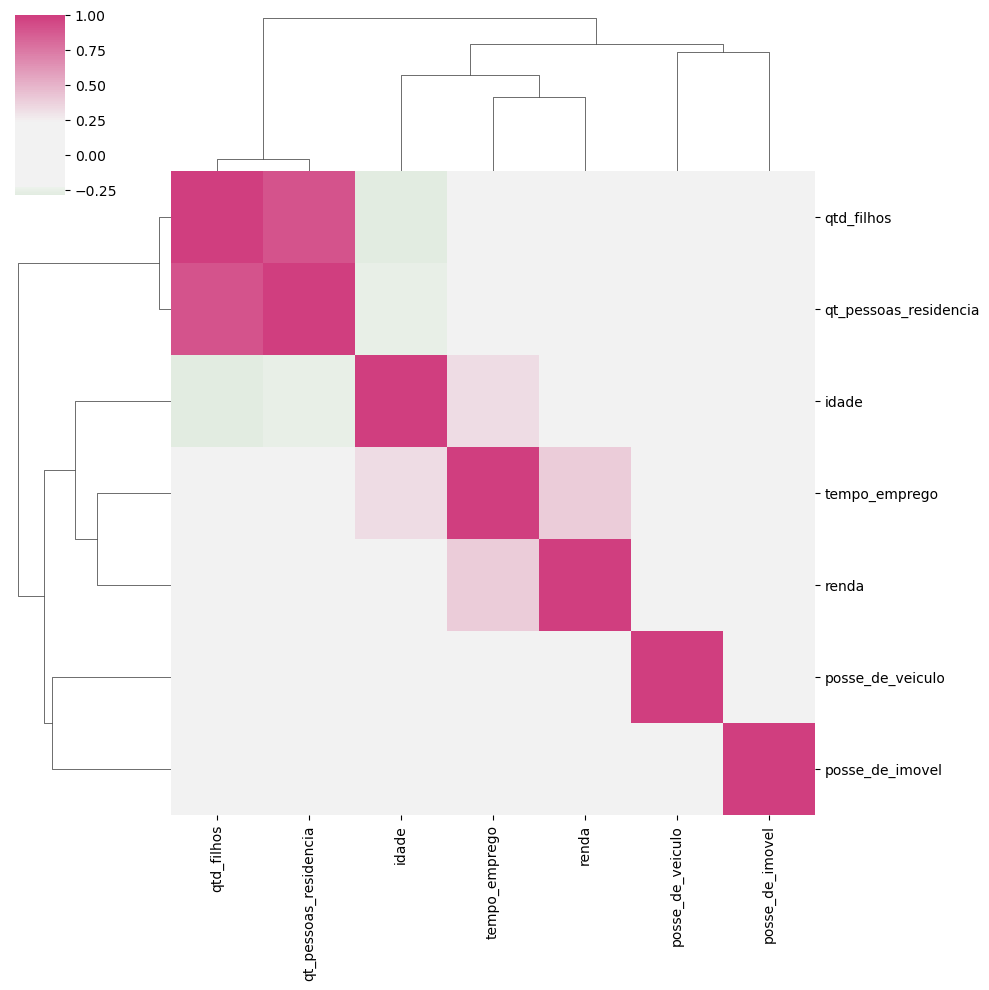

In [10]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(df.corr(), figsize=(10,10), center = 0, cmap=cmap)

# Resposta 1 - Avaliando a matriz de dispersão junto com avaliação gráfica é possível identificar que existe correlação maior entre as variáveis qt_pessoas_residencia X qtd_filhos, e seguidos pelas correlações renda X tempo_emprego e depois com idade X tempo_emprego

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

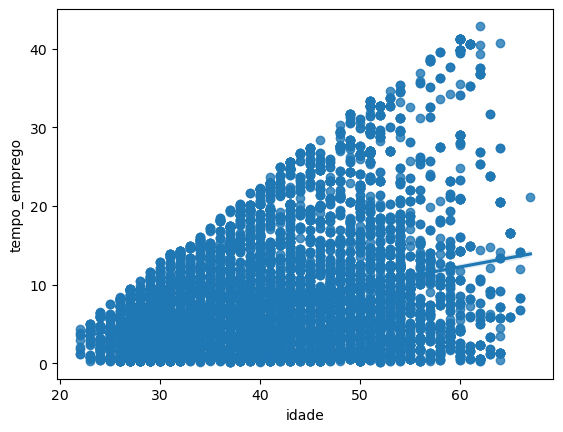

In [11]:
graf_1 = sns.regplot(x='idade', y='tempo_emprego', data = df)

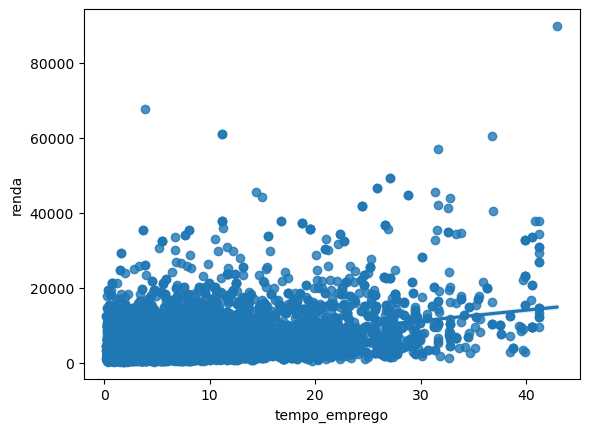

In [12]:
graf_1 = sns.regplot(x='tempo_emprego', y='renda', data = df)

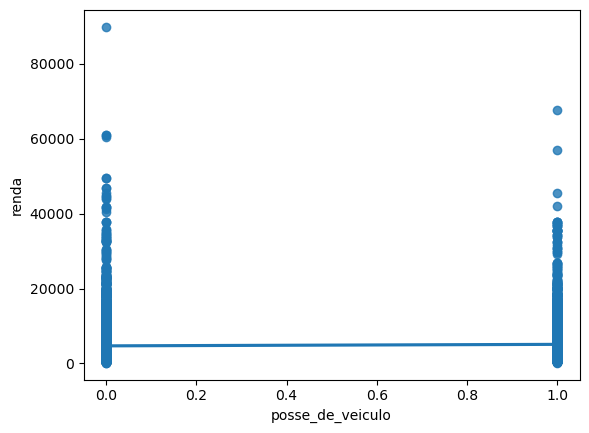

In [13]:
graf_1 = sns.regplot(x='posse_de_veiculo', y='renda', data = df)

3) Na su aopinião, há outliers na variável renda?

In [14]:
df.describe()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,12466.000000,12466.000000,12466.000000,12466.000000,12466.000000
mean,0.517327,40.701989,7.750462,2.313653,4850.045256
std,0.804358,9.362546,6.780216,0.955471,4873.182512
min,0.000000,22.000000,0.191781,1.000000,159.900000
25%,0.000000,33.000000,3.016438,2.000000,2026.390000
50%,0.000000,40.000000,6.016438,2.000000,3422.440000
75%,1.000000,48.000000,10.183562,3.000000,5916.970000
max,14.000000,67.000000,42.906849,15.000000,89918.040000


In [15]:
df_1 = df[df['renda'] > 80000]
df_1

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
9934,2015-10-01,F,False,True,0,Empresário,Secundário,Casado,Casa,62,42.906849,2.0,89918.04


# Na minha opinião existe sim, um outlier na base que possui um valor bem mais distante que a média dos demais.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

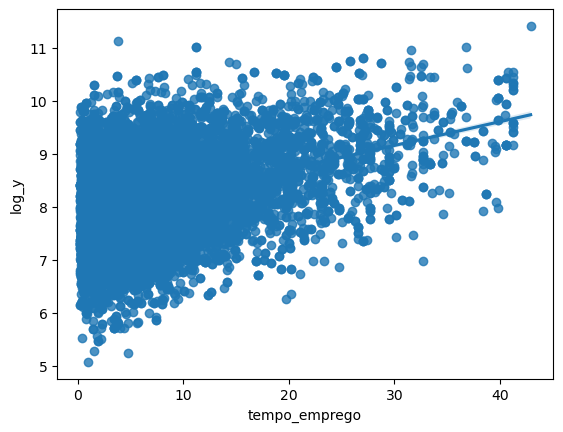

In [16]:
df2_log = df.copy()
df2_log['log_y'] = np.log(df2_log['renda'])
_ = sns.regplot(x='tempo_emprego', y='log_y', data = df2_log)

# Com o cálculo do logaritmo o outlier da análise desaparece

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

# Com aplicação do LOG faciltou a análise, melhorou a identificação de uma correlação negativa entre as variáveis, que mostra que quanto maior o tempo de emprego o valor da renda diminui